In [15]:
### basic
import sys
sys.path.append('../')
from config_sing import *
from config_func import *

plt.style.use('seaborn-whitegrid')

In [2]:
from umap             import UMAP
from sklearn.manifold import TSNE

In [3]:
fdiry = os.path.join(FD_RES, "regulatory_landscape")
os.listdir(fdiry)

['embedder_TileMPRA.P',
 '.ipynb_checkpoints',
 'embedder_TileMPRA_trn_epochs_05.P',
 'dat_output_ASTARR_zoom1_score_1e4.csv',
 'dat_output_TileMPRA_zoom1_count.csv',
 'dat_annot_TileMPRA.csv',
 'dat_output_TileMPRA_zoom1.csv',
 'dat_output_ASTARR_score_1e4.csv',
 'dat_output_ASTARR_zoom1_count_1e5.csv',
 'dat_output_ASTARR_count_1e4.csv',
 'dat_output_TileMPRA.csv',
 'dat_output_TileMPRA_zoom1_score.csv',
 'dat_output_ASTARR_zoom1.csv',
 'dat_output_ASTARR.csv',
 'dat_output_ASTARR_zoom1_count_1e4.csv',
 'dat_output_ASTARR_zoom1_score_1e5.csv',
 'dat_output_TileMPRA_1e5.csv',
 'dat_output_ASTARR_1e5.csv']

In [5]:
fdiry = os.path.join(FD_RES, "regulatory_landscape")
fname = "dat_output_ASTARR_zoom1_score_1e5.csv"
fpath = os.path.join(fdiry, fname)

dat_astarr = pd.read_csv(fpath)
print(dat_astarr.shape)
dat_astarr.head()

(100000, 281)


,Sample,Count,Fragment,Chrom,Start,End,Loc,Pct_GC,Input,Output,...,Mtf_MYB/1,Mtf_HINFP1/3,Mtf_ZNF435,Mtf_POU/2,Mtf_HD/17,Mtf_HD/9,Mtf_BCL6/1,Mtf_SOX/7,Mtf_HOMEZ,Mtf_HINFP1/2
0,Output_rep1,1,chrX_48780151_48780425,chrX,48780151,48780425,48780288,0.405109,-13.575177,-14.434689,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Output_rep1,1,chrX_48780151_48780424,chrX,48780151,48780424,48780288,0.406593,-13.575177,-14.434689,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Output_rep1,62,chrX_48780394_48780686,chrX,48780394,48780686,48780540,0.537671,-13.752054,-13.423511,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Output_rep1,62,chrX_48780394_48780686,chrX,48780394,48780686,48780540,0.537671,-13.752054,-13.423511,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Output_rep1,62,chrX_48780394_48780686,chrX,48780394,48780686,48780540,0.537671,-13.752054,-13.423511,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
fdiry = os.path.join(FD_RES, "regulatory_landscape")
fname = "dat_output_TileMPRA_zoom1_score_1e4.csv"
fpath = os.path.join(fdiry, fname)

dat_tmpra = pd.read_csv(fpath)
print(dat_tmpra.shape)
dat_tmpra.head()

(10000, 279)


,Fragment,Chrom,Start,End,Loc,Pct_GC,Input,Output,Log2fc,Mtf_HD/2,...,Mtf_MYB/1,Mtf_HINFP1/3,Mtf_ZNF435,Mtf_POU/2,Mtf_HD/17,Mtf_HD/9,Mtf_BCL6/1,Mtf_SOX/7,Mtf_HOMEZ,Mtf_HINFP1/2
0,chrX_48780051_48780250,chrX,48780051,48780250,48780151,0.512563,490.329907,685.302462,0.480485,6.0185,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,chrX_48780251_48780450,chrX,48780251,48780450,48780351,0.356784,31.183412,218.676508,2.813741,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,chrX_48780251_48780450,chrX,48780251,48780450,48780351,0.356784,31.183412,218.676508,2.813741,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,chrX_48780251_48780450,chrX,48780251,48780450,48780351,0.356784,31.183412,218.676508,2.813741,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,chrX_48780251_48780450,chrX,48780251,48780450,48780351,0.356784,31.183412,218.676508,2.813741,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
dat_comb = pd.concat([
    dat_astarr.assign(Source=lambda x: "ATAC-STARR"), 
    dat_tmpra.assign( Source=lambda x: "Tiling-MPRA")])
print(dat_comb.shape)

(110000, 282)


## Get matrix

In [10]:
dat = dat_astarr
lst = [col for col in dat.columns if col.startswith('Mtf')]
df1 = dat[lst]

print(df1.shape)
df1.head()

(100000, 270)


,Mtf_FOX/1,Mtf_HD/20,Mtf_ZNF449,Mtf_RFX/1,Mtf_ZFN121,Mtf_PAX/2,Mtf_YY1,Mtf_NFKB/2,Mtf_SPZ1,Mtf_SIX/2,...,Mtf_MYB/1,Mtf_HINFP1/3,Mtf_ZNF435,Mtf_POU/2,Mtf_HD/17,Mtf_HD/9,Mtf_BCL6/1,Mtf_SOX/7,Mtf_HOMEZ,Mtf_HINFP1/2
0,0.0,0.0000,9.784,0.0,10.0911,10.2331,0.00000,0.0,0.0,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0000,9.784,0.0,10.0911,10.2331,0.00000,0.0,0.0,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,22.3228,9.784,0.0,34.9201,41.6540,7.49225,0.0,0.0,8.4706,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,22.3228,9.784,0.0,34.9201,41.6540,7.49225,0.0,0.0,8.4706,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,22.3228,9.784,0.0,34.9201,41.6540,7.49225,0.0,0.0,8.4706,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
dat = dat_tmpra
lst = [col for col in dat.columns if col.startswith('Mtf')]
df2 = dat[lst]

print(df2.shape)
df2.head()

(10000, 270)


,Mtf_HD/2,Mtf_ZNF332,Mtf_POU/1,Mtf_MYB/5,Mtf_OSR2,Mtf_RFX/1,Mtf_GC-tract,Mtf_ZNF320,Mtf_KLF/SP/2,Mtf_TFAP2/1,...,Mtf_MYB/1,Mtf_HINFP1/3,Mtf_ZNF435,Mtf_POU/2,Mtf_HD/17,Mtf_HD/9,Mtf_BCL6/1,Mtf_SOX/7,Mtf_HOMEZ,Mtf_HINFP1/2
0,6.0185,7.7343,7.5087,8.3283,9.5878,7.2977,10.73138,11.3610,10.372733,17.7367,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0000,6.7109,0.0000,0.0000,0.0000,0.0000,7.04920,5.3739,8.823900,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0000,6.7109,0.0000,0.0000,0.0000,0.0000,7.04920,5.3739,8.823900,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0000,6.7109,0.0000,0.0000,0.0000,0.0000,7.04920,5.3739,8.823900,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0000,6.7109,0.0000,0.0000,0.0000,0.0000,7.04920,5.3739,8.823900,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
dat = pd.concat([df1, df2])
dat = dat.dropna(axis=1)

print(dat.shape)
dat.head()

(110000, 270)


,Mtf_FOX/1,Mtf_HD/20,Mtf_ZNF449,Mtf_RFX/1,Mtf_ZFN121,Mtf_PAX/2,Mtf_YY1,Mtf_NFKB/2,Mtf_SPZ1,Mtf_SIX/2,...,Mtf_MYB/1,Mtf_HINFP1/3,Mtf_ZNF435,Mtf_POU/2,Mtf_HD/17,Mtf_HD/9,Mtf_BCL6/1,Mtf_SOX/7,Mtf_HOMEZ,Mtf_HINFP1/2
0,0.0,0.0000,9.784,0.0,10.0911,10.2331,0.00000,0.0,0.0,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0000,9.784,0.0,10.0911,10.2331,0.00000,0.0,0.0,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,22.3228,9.784,0.0,34.9201,41.6540,7.49225,0.0,0.0,8.4706,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,22.3228,9.784,0.0,34.9201,41.6540,7.49225,0.0,0.0,8.4706,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,22.3228,9.784,0.0,34.9201,41.6540,7.49225,0.0,0.0,8.4706,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
X1 = df1.to_numpy()
X2 = df2.to_numpy()
X  = dat.to_numpy()

print(X1.shape)
print(X2.shape)
print(X.shape)

(100000, 270)
(10000, 270)
(110000, 270)


## Dimensional reduction

In [14]:
%%time
ump = UMAP(n_neighbors=15, n_jobs=8)
X_ump = ump.fit_transform(X)

/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/usr/local/lib/python3.6/dist-packages/umap/spectral.py:261: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  "WARNING: spectral initialisation failed! The eigenvector solver\n"
/usr/local/lib/python3.6/dist-packages/umap/spectral.py:261: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  "WARNING: spectral initialisation failed! The eigenvector solver\n"
/usr/local/lib/python3.6/dist-packages/umap/spectral.py:2

CPU times: user 3h 32min 22s, sys: 7h 17min 1s, total: 10h 49min 23s
Wall time: 1h 8min 23s


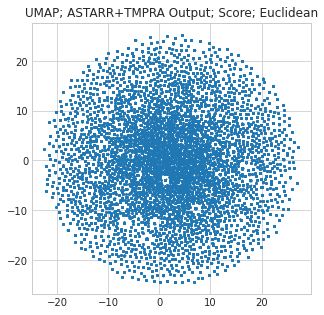

In [18]:
fig, ax = plt.subplots(figsize=(5, 5))

x = X_ump[:,0]
y = X_ump[:,1]
ax.scatter(x, y, s=1)
ax.set_title("UMAP; ASTARR+TMPRA Output; Score; Euclidean")
plt.show()

In [17]:
fdiry = os.path.join(FD_RES, "regulatory_landscape")
fname = "X_umap_output_zoom1_score.npy"
fpath = os.path.join(fdiry, fname)

with open(fpath, 'wb') as file:
    np.save(file, X_ump)

In [21]:
from matplotlib.lines import Line2D

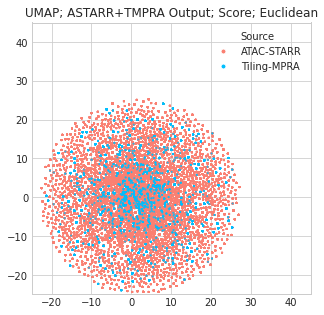

In [22]:
fig, ax = plt.subplots(figsize=(5, 5))

colors = {'ATAC-STARR':'salmon', 'Tiling-MPRA':'deepskyblue'}
c = dat_comb["Source"]
x = X_ump[:,0]
y = X_ump[:,1]

im = ax.scatter(x, y, s=1, c=c.map(colors), alpha=0.7)
ax.set_title("UMAP; ASTARR+TMPRA Output; Score; Euclidean")
ax.set_xlim(-25, 45)
ax.set_ylim(-25, 45)

leg = [
    Line2D([0],[0],marker='o',color="w",markerfacecolor='salmon',     markersize=5,label='ATAC-STARR'),
    Line2D([0],[0],marker='o',color="w",markerfacecolor='deepskyblue',markersize=5,label='Tiling-MPRA')
]
ax.legend(handles=leg, loc="upper right", title="Source")

plt.show()

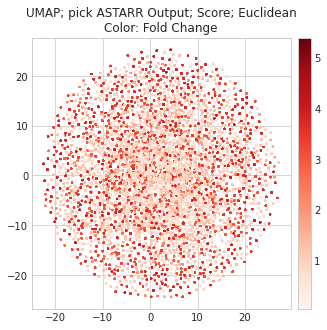

In [26]:
fig, ax = plt.subplots(figsize=(5, 5))

c = dat_astarr["Log2fc"]
c = np.exp2(c.to_numpy())
#c = c.to_numpy()

x = X_ump[:len(dat_astarr),0]
y = X_ump[:len(dat_astarr),1]

im = ax.scatter(x, y, c=c, s=1, cmap="Reds")
ax.set_title("UMAP; pick ASTARR Output; Score; Euclidean\nColor: Fold Change")
set_colorbar(ax, im) 
plt.show()

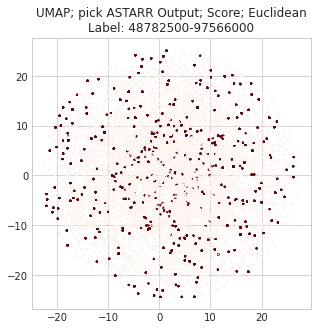

In [27]:
fig, ax = plt.subplots(figsize=(5, 5))

x1  = 48782500
x2  = x1 + 1000
c = dat_astarr["Loc"]
c = (c > x1) & (c < (x2))
#c = c.to_numpy()

x = X_ump[:len(dat_astarr),0]
y = X_ump[:len(dat_astarr),1]

im = ax.scatter(x, y, c=c, s=1, cmap="Reds", alpha=0.5)
ax.set_title(f"UMAP; pick ASTARR Output; Score; Euclidean\nLabel: {x1}-{x1+x2}" )
#set_colorbar(ax, im) 
plt.show()

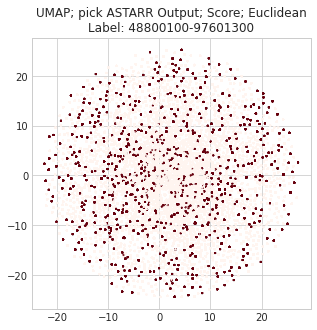

In [28]:
fig, ax = plt.subplots(figsize=(5, 5))

x1  = 48800000 + 100
x2  = x1 + 1100
c = dat_astarr["Loc"]
c = (c > x1) & (c < (x2))
#c = c.to_numpy()

x = X_ump[:len(dat_astarr),0]
y = X_ump[:len(dat_astarr),1]

im = ax.scatter(x, y, c=c, s=1, cmap="Reds", alpha=0.5)
ax.set_title(f"UMAP; pick ASTARR Output; Score; Euclidean\nLabel: {x1}-{x1+x2}" )
#set_colorbar(ax, im) 
plt.show()

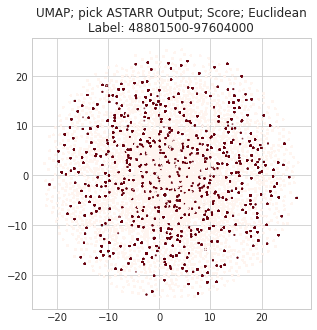

In [29]:
fig, ax = plt.subplots(figsize=(5, 5))

x1  = 48801500
x2  = x1 + 1000
c = dat_astarr["Loc"]
c = (c > x1) & (c < (x2))
#c = c.to_numpy()

x = X_ump[:len(dat_astarr),0]
y = X_ump[:len(dat_astarr),1]

im = ax.scatter(x, y, c=c, s=1, cmap="Reds", alpha=0.5)
ax.set_title(f"UMAP; pick ASTARR Output; Score; Euclidean\nLabel: {x1}-{x1+x2}" )
#set_colorbar(ax, im) 
plt.show()